## Pre-Processing and Training Data

In [1]:
#Importing all the libraries I believe I will be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from library.sb_utils import save_file

In [2]:
meta_df = pd.read_csv('SourceFiles/numerical_data.csv')

In [3]:
#as we can see, there are only numeric fields left in the Dataframe, netiher are null values left
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6726 entries, 0 to 6725
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   metastasis            6726 non-null   int64
 1   tneg                  6726 non-null   int64
 2   invasive              6726 non-null   int64
 3   breast_chest_radi     6726 non-null   int64
 4   nodal_radi            6726 non-null   int64
 5   chemo                 6726 non-null   int64
 6   antihormone           6726 non-null   int64
 7   her2_inhib            6726 non-null   int64
 8   neo                   6726 non-null   int64
 9   er                    6726 non-null   int64
 10  pr                    6726 non-null   int64
 11  p53                   6726 non-null   int64
 12  her2                  6726 non-null   int64
 13  node_status           6726 non-null   int64
 14  age                   6726 non-null   int64
 15  menopause             6726 non-null   int64
 16  node_p

In [4]:
#Counts of null values
na_df=pd.DataFrame(meta_df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount


In [5]:
#counts of response variable values
meta_df.metastasis.value_counts()

0    6193
1     533
Name: metastasis, dtype: int64

From our data (6726 records), 92% are metastasis free, while 8% presented metastasis

In [6]:
duplicateRowsDF = meta_df[meta_df.duplicated()]
duplicateRowsDF
#meta_df = meta_df.drop_duplicates()

,metastasis,tneg,invasive,breast_chest_radi,nodal_radi,chemo,antihormone,her2_inhib,neo,er,...,tumor_duct,tumor_lobular,size,grade,surgery_no_residual,surgery_residual,no primary site,conservation_surgery,mastectomy_surgery,no_surgery
4,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0
58,0,0,1,1,0,0,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
60,0,0,1,1,0,0,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
104,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,0,0,0,1,0
110,0,0,1,1,0,0,1,0,0,1,...,1,0,1,2,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6716,0,1,1,1,0,0,0,0,0,-1,...,1,0,1,2,1,0,0,1,0,0
6718,0,1,1,1,0,0,0,0,0,-1,...,1,0,1,3,1,0,0,1,0,0
6720,0,0,1,1,0,1,0,0,0,1,...,1,0,1,2,1,0,0,1,0,0
6722,0,0,1,0,0,0,1,0,0,1,...,0,1,1,2,1,0,0,0,1,0


### Split the data into test and train subsamples

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from pprint import pprint

y = meta_df.metastasis
X = meta_df.drop('metastasis', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [8]:
y0 = meta_df[meta_df['metastasis']==0].metastasis.values
X0 = meta_df[meta_df['metastasis']==0].drop('metastasis', axis=1).values

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.2, random_state=1)

y1 = meta_df[meta_df['metastasis']==1].metastasis.values
X1 = meta_df[meta_df['metastasis']==1].drop('metastasis', axis=1).values

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.2, random_state=1)

X_train = np.concatenate((X0_train, X1_train))
X_test = np.concatenate((X0_test, X1_test))
y_train = np.concatenate((y0_train, y1_train))
y_test = np.concatenate((y0_test, y1_test))

#### Building the model with default parameters

In [9]:
#scale the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
#Random Forest Classifier
clf = RandomForestClassifier(random_state = 1)
#fit the model
model_res = clf.fit(X_train_scaled, y_train)
#Predict on test data
y_pred = model_res.predict(X_test_scaled)
#Obtain the predition probabilities
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
#Get the accuracy scores
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
#Print results and default parameters
print('Random Forest: Accuracy=%.3f' % (ac))
print('Random Forest: f1-score=%.3f' % (f1))
print('Parameters currently in use:\n')
pprint(clf.get_params())

Random Forest: Accuracy=0.921
Random Forest: f1-score=0.899
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


#### Tunning the hiperparameters of the model

In [10]:
random_grid = {}

In [11]:
#I am chossing cv=10 because, without duplicates, the amount of metastazed patients are 12% and 88% are metastazed free 
#This way, I ensure there is always representation for metastazed patients.
def validate(param_name, param_range, cv=5):
    train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = param_name, 
                                param_range = param_range, cv = cv)
    return train_scoreNum, test_scoreNum

In [12]:
def plot_param(train_scoreNum, test_scoreNum):
    train_scoreNum = train_scoreNum * 100
    test_scoreNum = test_scoreNum * 100
    train_scores_mean = np.mean(train_scoreNum, axis=1)
    train_scores_std = np.std(train_scoreNum, axis=1)
    test_scores_mean = np.mean(test_scoreNum, axis=1)
    test_scores_std = np.std(test_scoreNum, axis=1)

    plt.title("Validation Curve with RandomForestClassifier")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy Score %")
    plt.ylim(test_scoreNum.min(), train_scoreNum.max())
    lw = 1
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
    plt.legend(loc="best")
    plt.rcParams["figure.figsize"] = (20,5)
    plt.grid(axis='both')
    plt.show()

In [13]:
def print_scores(scores, range):
    print("     cv=1       cv=2       cv=3       cv=4       cv=5")
    for row in zip(scores, range):
        print(row[1], row[0].mean())

##### class_weight

In [14]:
param_name = 'class_weight'
weights = np.linspace(0.08, 0.92, 20)
param_range = [{0: x, 1: 1.0-x} for x in weights]

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
{0: 0.08, 1: 0.92} 0.9805762081784387
{0: 0.12421052631578948, 1: 0.8757894736842106} 0.982620817843866
{0: 0.16842105263157897, 1: 0.831578947368421} 0.9835966542750929
{0: 0.21263157894736845, 1: 0.7873684210526315} 0.9844795539033457
{0: 0.2568421052631579, 1: 0.743157894736842} 0.9849907063197026
{0: 0.3010526315789474, 1: 0.6989473684210525} 0.9851765799256504
{0: 0.3452631578947369, 1: 0.6547368421052631} 0.9851765799256507
{0: 0.38947368421052636, 1: 0.6105263157894736} 0.9852230483271377
{0: 0.43368421052631584, 1: 0.5663157894736841} 0.9852695167286246
{0: 0.4778947368421053, 1: 0.5221052631578946} 0.9852695167286246
{0: 0.5221052631578947, 1: 0.47789473684210526} 0.9852695167286246
{0: 0.5663157894736842, 1: 0.4336842105263158} 0.9852695167286246
{0: 0.6105263157894737, 1: 0.3894736842105263} 0.9852695167286246
{0: 0.6547368421052632, 1: 0.3452631578947368} 0.9852695167286246
{0: 0.6989473684210527, 1: 0.301

In [15]:
#Adding the parameter to the dictionary
random_grid['class_weight'] = [{0:0.56, 1:0.44}]

##### criterion

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
gini 0.9852230483271376
entropy 0.9851301115241636
test_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
gini 0.9167286245353161
entropy 0.9154275092936803


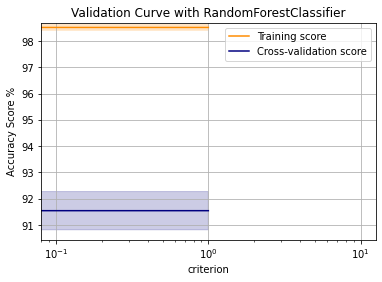

In [16]:
param_name = 'criterion'
param_range = ['gini','entropy']

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)
plot_param(train_scoreNum, test_scoreNum)

In [17]:
#Adding the parameter to the dictionary
random_grid['criterion'] = ['entropy']

##### max_depth

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
1 0.9208178438661709
2 0.9208178438661709
3 0.9208178438661709
4 0.92114312267658
5 0.9228624535315983
6 0.9248605947955391
7 0.929042750929368
8 0.9346189591078067
9 0.9403810408921933
10 0.9480947955390334
11 0.9550650557620818
12 0.962732342007435
13 0.9693308550185874
14 0.9741635687732343
15 0.979182156133829
16 0.9815055762081786
17 0.98364312267658
18 0.9843401486988848
19 0.9850836431226766
20 0.9851301115241636
21 0.9852230483271376
22 0.9852230483271376
23 0.9852695167286246
24 0.9852230483271376
25 0.9852695167286246
26 0.9852230483271377
27 0.9852695167286246
test_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
1 0.9208178438661709
2 0.9208178438661709
3 0.9208178438661709
4 0.9206319702602231
5 0.9213754646840149
6 0.9217472118959108
7 0.9217472118959108
8 0.9224907063197026
9 0.9232342007434944
10 0.9243494423791822
11 0.9234200743494423
12 0.9221189591078067
13 0.9223048327137546
14 0.921

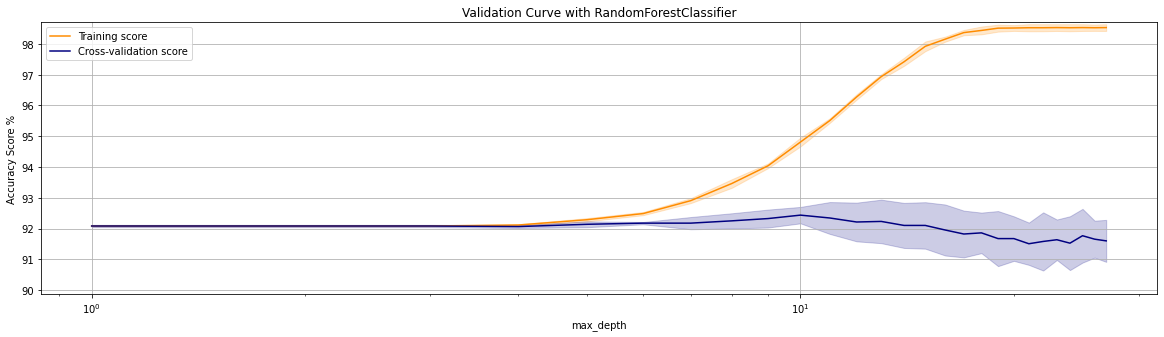

In [18]:
param_name = 'max_depth'
param_range = [int(x) for x in np.linspace(1, 27, num = 27)]

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)
#param_range = param_range[:-1]
plot_param(train_scoreNum, test_scoreNum)

In [19]:
#Adding the parameter to the dictionary
random_grid['max_depth'] = [9, 11, 13, 15]

##### min_samples_leaf

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
1 0.9852230483271376
2 0.9396840148698885
4 0.9264869888475836
test_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
1 0.916542750929368
2 0.9224907063197026
4 0.9217472118959108


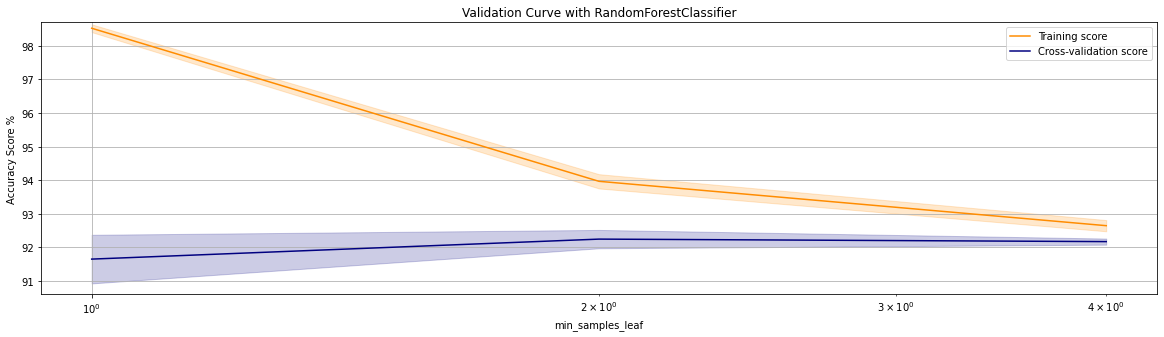

In [20]:
param_name = 'min_samples_leaf'
param_range = [1, 2, 4]

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)
plot_param(train_scoreNum, test_scoreNum)

In [21]:
#Adding the parameter to the dictionary
random_grid['min_samples_leaf'] = [1, 2]

##### min_samples_split

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
2 0.9852230483271376
4 0.9603624535315985
5 0.9523234200743493
6 0.9472118959107807
8 0.9411710037174721
10 0.9361988847583642
test_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
2 0.9161710037174722
4 0.9215613382899628
5 0.9228624535315986
6 0.9232342007434944
8 0.9217472118959107
10 0.9232342007434944


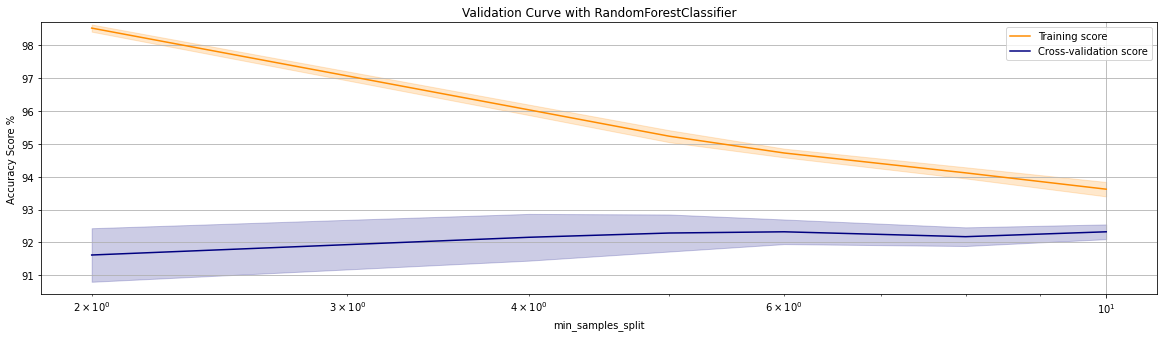

In [22]:
param_name = 'min_samples_split'
param_range = [2, 4, 5, 6, 8, 10]

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)
plot_param(train_scoreNum, test_scoreNum)

In [23]:
#Adding the parameter to the dictionary
random_grid['min_samples_split'] = [2, 6]

##### n_estimators

train_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
100 0.9852230483271377
150 0.9852695167286246
200 0.9852230483271376
250 0.9852695167286246
300 0.9852695167286246
350 0.9852695167286246
400 0.9852695167286246
500 0.9852695167286246
600 0.9852695167286246
test_scoreNum
     cv=1       cv=2       cv=3       cv=4       cv=5
100 0.9152416356877323
150 0.9159851301115243
200 0.9171003717472118
250 0.9169144981412639
300 0.9169144981412639
350 0.9174721189591079
400 0.9169144981412639
500 0.9169144981412639
600 0.91635687732342


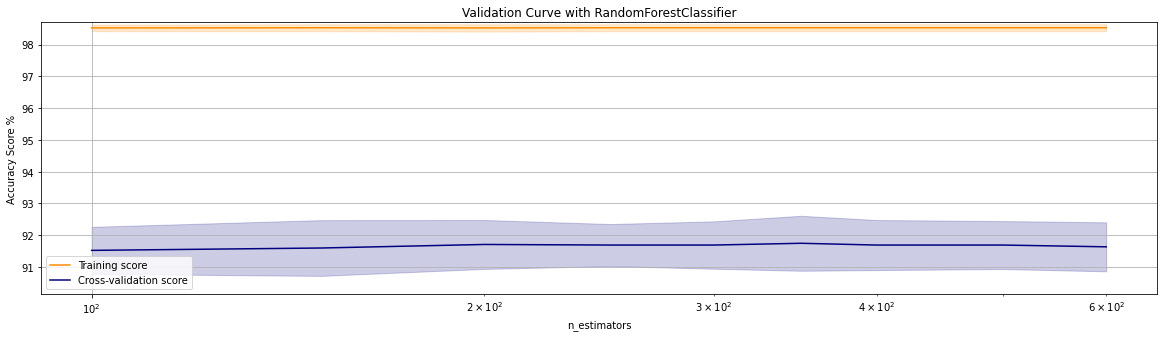

In [24]:
param_name = 'n_estimators'
param_range = [100, 150, 200, 250, 300, 350, 400, 500, 600]

train_scoreNum, test_scoreNum = validate(param_name, param_range)
print("train_scoreNum")
print_scores(train_scoreNum, param_range)
print("test_scoreNum")
print_scores(test_scoreNum, param_range)
plot_param(train_scoreNum, test_scoreNum)

In [25]:
#Adding the parameter to the dictionary
random_grid['n_estimators'] = [250, 300]

### Setup the GridSearchCV

In [26]:
# These are the parameters to test
pprint(random_grid)

{'class_weight': [{0: 0.56, 1: 0.44}],
 'criterion': ['entropy'],
 'max_depth': [9, 11, 13, 15],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 6],
 'n_estimators': [250, 300]}


In [27]:
clf_cv = GridSearchCV(clf, random_grid, cv=5)
clf_cv.fit(X_train, y_train)
# Predict the labels of the test set: y_pred
y_pred = clf_cv.predict(X_test)

In [28]:
print("Tuned Random Forest Parameter: {}".format(clf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(clf_cv.best_score_))
print("Accuracy: {}".format(clf_cv.score(X_test, y_test)))
print("Classification report")
print(classification_report(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Tuned Random Forest Parameter: {'class_weight': {0: 0.56, 1: 0.44}, 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.9237918215613383
Accuracy: 0.924219910846954
Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1239
           1       0.73      0.07      0.14       107

    accuracy                           0.92      1346
   macro avg       0.83      0.54      0.55      1346
weighted avg       0.91      0.92      0.89      1346

Confusion Matrix
[[1236    3]
 [  99    8]]


28


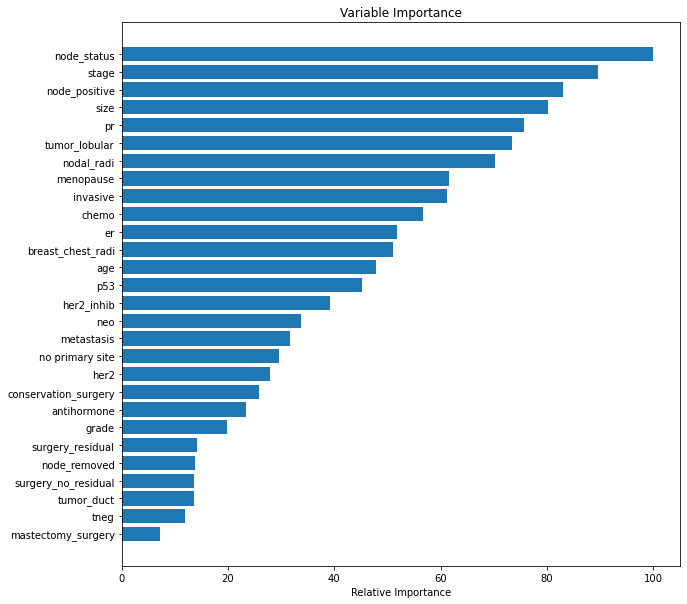

In [31]:
#Plot feature importances
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, meta_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()